### Erdos Data science boot camp

Project: text classification

Author: Federico Holm

Description: this project aims to become a tool for organizations and researchers looking to sinthesize highly-technical information from public federal documents (public comments to federal climate change regulations) via suppervised classification in which the target is a feature present in the text. Feature in this context means a relevant policy-oriented argument the sender of the comment includes in the text. For example, one relevant feature is the legal authority of the federal agency to develop such regulation. A supervised classifier can be trained and tested in a hand-labeled subset of all available comments (ranging from 2 to 100s of pages) to later be extended to unlabeled texts, thus scaling up human effort enormously. In many cases, NGOs or think tanks might need to generate a diagnosis of what the landscape of public comments to a public agency looks like and might not have the human power to read hundreds or thousands of lengthy documents. 

The motivation for this project stems with recent conversations with organizations working on legal issues regarding environmental policy and justice. 

This tool can help fill this void and help organizations:

a - characterize the entire corpus of documents and gauge the main arguments organizations are using to oppose or support regulations,

b - develop strategies based on new information,

c - identify who is working on which topic and establish relationships, since every comment is associated with a specific organization.

In [1]:
from nltk.corpus import PlaintextCorpusReader
# this code will be helpful for reading in all the text files
import glob
from nltk import tokenize


This link provides access to the folder with the data

https://www.dropbox.com/sh/0jfcdpa6osw8laq/AACu3zyD3cKrfdhXQtlZZudXa?dl=0

The location of the folder has to be updated in the following line to read the files.

In [2]:
# glob will provide a list of all data files
# matching a certain format in your computer
files = glob.glob("C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Clean Power Plan_txt_files/*")


files


['C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Clean Power Plan_txt_files\\60 Plus Association.txt',
 'C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Clean Power Plan_txt_files\\Adirondack Mountain Club.txt',
 'C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Clean Power Plan_txt_files\\Advanced Energy Economy.txt',
 'C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Clean Power Plan_txt_files\\Advanced Energy Management Alliance.txt',
 'C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Clean Power Plan_txt_files\\Air Permitting Forum.txt',
 'C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Clean Power Plan_txt_files\\Alaska Power Association.txt',
 'C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Clean Power Plan_txt_files\\ALLETE.txt',
 'C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Clean Power Plan_txt_files\\Alliance for Fuel Options, Reliability and Diversity.txt',
 'C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Clean Power Plan_txt_f

In [3]:
CPP = []

for file in files:
    f = open(file,'r', encoding="utf8", errors='ignore')
    CPP.append(f.read())
    f.close()

Based on the file list, localize any possible files that don't belong. In this case, the desktop.ini file needs to be removed.

In [4]:
CPP[75]

'[LocalizedFileNames]\nState of Oklahoma (2).txt=@State of Oklahoma (2),0\nCity of Springfield, IL.txt=@City of Springfield, IL,0\n'

In [5]:
CPP.remove('[LocalizedFileNames]\nState of Oklahoma (2).txt=@State of Oklahoma (2),0\nCity of Springfield, IL.txt=@City of Springfield, IL,0\n')

In [6]:
# Check the length, there should be 261 documents

len(CPP)

261

In [7]:
# Tidy a bit
for i in range(len(CPP)):
    CPP[i] = CPP[i].replace("\n"," ").replace("\ "," ").replace("\x0c", " ").replace("\""," ").replace("/"," ")

In [8]:
CPP[65]

"December 1, 2014  To:  Environmental Protection Agency  From:  Keith Reopelle, Senior Policy Director, Clean Wisconsin; Tyson Cook, Director of Science and Research, Clean Wisconsin; Matthew Landi, Science and Policy Associate, Clean Wisconsin  Subject:  Public Comment on Docket ID: EPA-HQ-OAR-2013-0602; Standards of Performance for Greenhouse Gas Emissions from Existing Sources: Electric Utility Generating Units  Clean Wisconsin thanks the Environmental Protection Agency for its historic effort to regulate carbon pollution in the United States through proposing new CAA 111(d) rules, also known as the Clean Power Plan ( CPP ). We also thank EPA for this opportunity to comment on the CPP in order to create a stronger, more informed, and ultimately, a more successful carbon pollution mitigation regulatory regime. We want to recognize that these rules have great potential benefit for the protecting public health and natural resources in the state of Wisconsin. The Third National Climate 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\w+")
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [10]:
def norm(u):
    return np.sqrt(np.sum(np.power(u,2)))

## You write a function to get the cosine similarity
def cos_sim(u,v):
    if norm(u)*norm(v) > 0:
        return (u.dot(v))/(norm(u)*norm(v))
    else:
        return np.nan

In [11]:
# This will take in a list of tokenized texts
# and return a list of the unique words, which forms the basis
def get_bow_basis(token_list):
    basis_set = []
    
    for tokens in token_list:
        for token in tokens:
            basis_set.append(token)
            
    return list(set(basis_set))

## This will take in a basis set and a message's tokens
## and return the bow numpy array (vector)
def get_bow_vector(tokens, basis_set):
    token_dict = {}
    
    for token in basis_set:
        token_dict[token] = 0 
    
    for token in tokens:
        token_dict[token] = token_dict[token] + 1
        
    return np.array(list(token_dict.values()))

In [15]:
# we'll first record all words used
# across the corpus
token_lists = []

# for each text in the corpus
for text in CPP:
    # append a list of tokens
    token_lists.append([word.lower() for word in tokenizer.tokenize(text) if word.lower() not in stop])

In [16]:
len(token_lists[2])

39625

In [17]:
# now we'll get the words bow basis set
words_bow_basis = get_bow_basis(token_lists)

In [18]:
words_bow_basis

['ercot_monthly_operational_overview_201409',
 'theoretically',
 'marketplace',
 'johan',
 'commentresponse',
 'absolutely',
 'arl',
 'lzn',
 'bingaman',
 'reliabilltv',
 'useof',
 'iforni',
 'l4',
 'bottoms',
 'co13o1',
 'dircctly',
 'textual',
 'truction',
 'pellow',
 'circumference',
 '2591',
 '2iii',
 'specter',
 '2011_media_e',
 'procured',
 'eaux',
 'werner',
 'corresponds',
 '10769',
 'iarrisburg',
 'shaded',
 'tiernan',
 'granicus',
 'reliabiiity',
 'pile',
 'absorbers',
 'usxu',
 'realizable',
 'breach',
 'mthly',
 'protesting',
 'penalize',
 'deinked',
 'aaicae',
 'savings25',
 'amo',
 'level',
 '9163',
 'georgians',
 'cuof',
 'kempthorne',
 'preaching',
 'viii',
 'approches',
 's886v7',
 'propensity',
 'california',
 'roberto',
 'oummk',
 'conclusion',
 'added',
 'mwhnet',
 'inforfrtation',
 'misapplication',
 'vp',
 'contemplating',
 'shadow',
 'jinmei',
 '4105',
 'goods',
 '2nz',
 'nielson',
 'adoptant',
 'overflow',
 'recommends',
 'incinerated',
 'socialized',
 'pathways

In [19]:
# Now we'll make our bow word count matrix
doc_term = np.zeros((len(CPP), len(words_bow_basis)))

# for each document in the corpus
for i in range(len(CPP)):
    # get the word count vector
    doc_term[i,:] = get_bow_vector(token_lists[i], words_bow_basis)

In [20]:
doc_term

array([[0., 0., 2., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 6., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
### Word frequency

# turn the word count vector into a frequency vector
# This divides each row of the word count matrix (each document)
# by it's row sum (how many words are in the document)
doc_term_freq = doc_term/np.sum(doc_term,axis=1).reshape(-1,1)

### Word TF-IDF

In [22]:
# make the tfidf matrix
document_frequencies = np.zeros(len(words_bow_basis))

for j in range(len(words_bow_basis)):
    for i in range(len(CPP)):
        if doc_term[i,j] > 0:
            document_frequencies[j] = document_frequencies[j] + 1
            
idfs = np.log10(2/document_frequencies)

In [23]:
# the tfidf matrix
doc_term_tfidf = doc_term_freq*idfs

### The TF-IDF Matrix will be the base for the bag of words approaches used in classification

In [24]:
doc_term_tfidf.shape

(261, 48261)

### Reading the tabular data with the categories

#### The TF-IDF is the entire X matrix for the entire labeled corpus. Each hand-coded label (20 categories in total) can be used as individual target variables in the classification problem. This allows to explore a range of target variables that differ in the proportions of 1s and 0s, thus providing some options to train and test the classifiers on different real-world data. 

#### For this project, I will develop classifiers for three critical target variables: (a) the presence of discourse regarding the EPA's legal basis for developing this specific rule, (b) the presence of discourse regarding recognition of past investment in clean energy, and (c) the presence of discourse regarding environmental justice. 

#### The motivation for these target variables is twofold: first, they are important information for NGOs and think tanks that are involved in federal policymaking. Second, they are examples of balanced (b) and unbalanced (a,c) target variables: there are more 1s than 0s in a, whereas the opposite happens in c. 

In [25]:
categories = pd.read_csv("C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Actor_attributes_CPP.csv")

In [26]:
categories.head(5)

,NAME,ORG_TYPE,Legal_basis,Methodology_calculations,Past_investments_credits,Cost to adapt to ru;e,Less_reliable,More_reliable,Withdraw,Economic_benefits,...,Health_costs,Timeline_compliance,Flexibility,Demand_response_programs,Technical_feasibility,Stringency_level,Justice,Special_treatment,Sum_args,Words
0,60 Plus Association,Industry/commerce,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,5,13023
1,Adirondack Mountain Club,Environmental/climate,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3,581
2,Advanced Energy Economy,Industry/commerce,0,1,0,0,0,1,0,1,...,0,1,1,1,0,0,0,0,7,42960
3,Advanced Energy Management Alliance,Think tank,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,4637
4,Air Permitting Forum,Citizen Group,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,3,3032


In [27]:
len(categories)

261

#### Target: a - legal basis for the development of the rule. 

In [28]:
legal = categories[["NAME","Legal_basis"]]

In [29]:
legal.head(5)

,NAME,Legal_basis
0,60 Plus Association,1
1,Adirondack Mountain Club,0
2,Advanced Energy Economy,0
3,Advanced Energy Management Alliance,0
4,Air Permitting Forum,1


In [30]:
legal = legal.rename(columns={"Legal_basis": "target"})

In [31]:
legal.head(5)

,NAME,target
0,60 Plus Association,1
1,Adirondack Mountain Club,0
2,Advanced Energy Economy,0
3,Advanced Energy Management Alliance,0
4,Air Permitting Forum,1


In [32]:
legal['target'].value_counts()

1    180
0     81
Name: target, dtype: int64

In [33]:
doc_term_tfidf.shape

(261, 48261)

In [34]:
legal.shape

(261, 2)

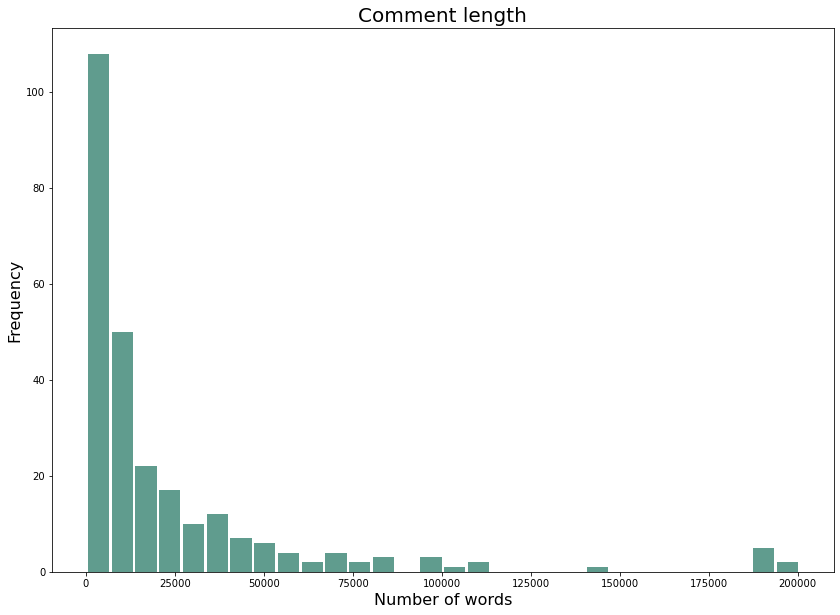

In [35]:
plt.figure(figsize=(14,10))
plt.hist(categories['Words'], bins=30, rwidth=0.9,color='#609c8e')

plt.title("Comment length",fontsize=20)
plt.ylabel("Frequency",fontsize=16)
plt.xlabel("Number of words",fontsize=16)

plt.savefig('C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/Comment_length.png')

plt.show()

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.base import clone

In [37]:
## Use these to compute accuracy, precision, and recall

## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score

In [38]:
X_train_legal, X_test_legal, y_train_legal, y_test_legal = train_test_split(doc_term_tfidf, legal['target'], test_size=0.3, random_state=440,stratify=legal['target'])

In [39]:
y_train_legal

95     0
192    1
138    1
172    0
20     0
      ..
74     1
153    0
225    1
257    0
160    0
Name: target, Length: 182, dtype: int64

In [40]:
print(y_train_legal.value_counts())
print(y_test_legal.value_counts())

1    126
0     56
Name: target, dtype: int64
1    54
0    25
Name: target, dtype: int64


 #### Stochastic gradient descent

In [41]:
sgd_clf = SGDClassifier(random_state=123)
sgf_clf_scores = cross_val_score(sgd_clf, X_train_legal, y_train_legal, scoring = "recall", cv=5)
print(sgf_clf_scores)
print("Recall:",sgf_clf_scores.mean())

[0.68 1.   1.   0.72 0.92]
Recall: 0.8640000000000001


In [42]:
cross_val_score(sgd_clf, X_train_legal, y_train_legal, cv=5, scoring='accuracy')
print("Accuracy:",sgf_clf_scores.mean())

Accuracy: 0.8640000000000001


Looking at the confusion matrix

In [43]:
sgf_clf_pred = cross_val_predict(sgd_clf, X_train_legal, y_train_legal, cv=5)
print(confusion_matrix(y_train_legal, sgf_clf_pred))



#_____________________________________________
#             |                |
#             |  PREDICTED NO  | PREDICTED YES
#_____________| ______________ | _____________
#             |                |
# ACTUAL NO   |                |
#_____________| ______________ | _____________
#             |                |
# ACTUAL YES  |                |
#_____________| ______________ | _____________


[[ 29  27]
 [ 17 109]]


In [44]:
grid = {'fit_intercept': [True,False],
        'early_stopping': [True, False],
        'loss' : ['log'],
        'penalty' : ['l2', 'l1', 'none']}
search = GridSearchCV(estimator=sgd_clf, param_grid=grid, cv=10)
search.fit(X_train_legal, y_train_legal)
search.best_params_

{'early_stopping': False,
 'fit_intercept': False,
 'loss': 'log',
 'penalty': 'none'}

In [45]:
grid_sgd_clf_scores = cross_val_score(search.best_estimator_, X_train_legal, y_train_legal, cv=10)
print(grid_sgd_clf_scores)
print("Accuracy:", grid_sgd_clf_scores.mean())

[0.84210526 0.94736842 0.88888889 0.77777778 0.77777778 0.94444444
 0.88888889 0.83333333 0.88888889 0.83333333]
Accuracy: 0.862280701754386


In [46]:
grid_sgd_clf_scores = cross_val_score(search.best_estimator_, X_train_legal, y_train_legal, scoring = "recall",cv=10)
print(grid_sgd_clf_scores)
print("Recall:", grid_sgd_clf_scores.mean())

[0.92307692 1.         1.         0.83333333 1.         1.
 1.         0.92307692 1.         0.84615385]
Recall: 0.9525641025641025


#### Linear support vector machine SVM

In [47]:
from sklearn.svm import LinearSVC

In [48]:
svc_legal = LinearSVC()
svc_legal.fit(X_train_legal,y_train_legal)

LinearSVC()

In [49]:
train_pred_legal = svc_legal.predict(X_train_legal)

In [50]:
def tpr(actual,pred):
    tp = np.sum((actual==1) & (pred == 1))
    fn = np.sum((actual==1) & (pred == 0))
    return tp/(tp+fn)
    
def fpr(actual,pred):
    fp = np.sum((actual == 0) & (pred == 1))
    tn = np.sum((actual == 0) & (pred == 0))
    return fp/(fp+tn)

def acc(actual,pred):
    return np.sum(actual==pred)/len(actual)

In [51]:
print("The training tpr is",tpr(y_train_legal,train_pred_legal))
print("The training fpr is",fpr(y_train_legal,train_pred_legal))
print("The training accuracy is",acc(y_train_legal,train_pred_legal))

The training tpr is 1.0
The training fpr is 0.9642857142857143
The training accuracy is 0.7032967032967034


Notice any problem? An imbalanced dataset with a majority of the target class being 1s creates a situation in which the classifier labels almost all as 1, and therefore gives us a decent true possitive rate. However, the accuracy shows that the classifier does not work very well.

In [52]:
train_pred_legal

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

##### We need to estimate using cross-validation. 

In [68]:
## Linear SVC (10-fold cross validation)

# I tested values of C = 0 < C < 1, and no difference in meassures were found for any values C < 1, thus the loop for various
# values of C begins in 1 and increases by 1

kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)

df = pd.DataFrame(X_train_legal)
y_train_df = pd.DataFrame (y_train_legal)
X_train_copy = df.copy()


# Regularization parameter 
Cs = 25

svc_accs = np.zeros((10, Cs))
svc_precs = np.zeros((10, Cs))
svc_recs = np.zeros((10, Cs))



for j in range(1,Cs+1):
    print("Regularization parameter =",j)
    svc_legal = LinearSVC(penalty='l2', loss='squared_hinge',dual=True, tol=0.0001, C=j, 
                multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                verbose=0, random_state=None, max_iter=5000)
    
    i = 0

    for train_index,test_index in kfold.split(X_train_copy,y_train_df):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train_df.iloc[train_index],y_train_df.iloc[test_index]

        svc_clone_legal = clone(svc_legal)
        svc_clone_legal.fit(X_train_train, np.ravel(y_train_train,order='C'))
        
        y_legal_predict = svc_clone_legal.predict(X_train_test)
        svc_accs[i, j-1] = accuracy_score(y_train_test,y_legal_predict)
        svc_precs[i,j-1] = precision_score(y_train_test,y_legal_predict)
        svc_recs[i,j-1] = recall_score(y_train_test,y_legal_predict)
        i = i + 1

Regularization parameter = 1
Regularization parameter = 2
Regularization parameter = 3
Regularization parameter = 4
Regularization parameter = 5
Regularization parameter = 6
Regularization parameter = 7
Regularization parameter = 8
Regularization parameter = 9
Regularization parameter = 10
Regularization parameter = 11
Regularization parameter = 12
Regularization parameter = 13
Regularization parameter = 14
Regularization parameter = 15
Regularization parameter = 16
Regularization parameter = 17
Regularization parameter = 18
Regularization parameter = 19
Regularization parameter = 20
Regularization parameter = 21
Regularization parameter = 22
Regularization parameter = 23
Regularization parameter = 24
Regularization parameter = 25


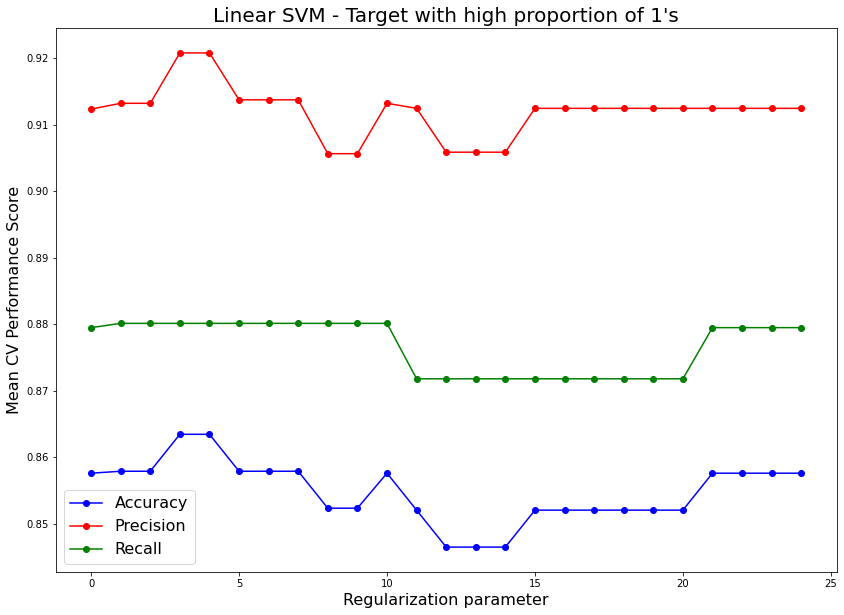

In [69]:
## Plot that mean cv measure against max_depth

## Sample Answer
plt.figure(figsize=(14,10))

plt.plot(np.mean(svc_accs,axis=0),'b-o', label="Accuracy")
plt.plot(np.mean(svc_precs,axis=0),'r-o', label="Precision")
plt.plot(np.mean(svc_recs,axis=0),'g-o', label="Recall")

plt.title("Linear SVM - Target with high proportion of 1's",fontsize=20)
plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Regularization parameter",fontsize=16)

plt.legend(fontsize=16)
plt.savefig('C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/linearSVC_legal.png')
plt.show()

### Decision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
max_depth = 5
tree_clf_legal = DecisionTreeClassifier(max_depth = max_depth, 
                                  random_state = 614)

## Fit the tree
tree_clf_legal.fit(X_train_legal, y_train_legal)

DecisionTreeClassifier(max_depth=5, random_state=614)

Let's see the confusion matrix to see how the model is doing.

In [72]:
train_pred_legal = tree_clf_legal.predict(X_train_legal)

In [73]:

#_____________________________________________
#             |                |
#             |  PREDICTED NO  | PREDICTED YES
#_____________| ______________ | _____________
#             |                |
# ACTUAL NO   |                |
#_____________| ______________ | _____________
#             |                |
# ACTUAL YES  |                |
#_____________| ______________ | _____________


In [74]:
print(confusion_matrix(y_train_legal, train_pred_legal))

[[ 56   0]
 [  0 126]]


##### Maybe -just maybe- we are overfitting. Again, we must do cross validation.

In [75]:
# Decision Tree (10-fold cross validation) 

# convert to DataFrame
df = pd.DataFrame(X_train_legal)
y_train_df = pd.DataFrame (y_train_legal)
X_train_copy = df.copy()

kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)

# n will be the maximum max_depth I consider
n = 20

tree_accs = np.zeros((10,n))
tree_precs = np.zeros((10,n))
tree_recs = np.zeros((10,n))

for j in range(1, n+1):
    print("Depth =", j)    
    tree_legal = DecisionTreeClassifier(max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train_df):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train_df.iloc[train_index],y_train_df.iloc[test_index]

        tree_legal_clone = clone(tree_legal)
        tree_legal_clone.fit(X_train_train,y_train_train)
        
        y_predict_legal = tree_legal_clone.predict(X_train_test)
        tree_accs[i,j-1] = accuracy_score(y_train_test,y_predict_legal)
        tree_precs[i,j-1] = precision_score(y_train_test,y_predict_legal)
        tree_recs[i,j-1] = recall_score(y_train_test,y_predict_legal)
        i = i + 1

Depth = 1
Depth = 2
Depth = 3
Depth = 4
Depth = 5
Depth = 6
Depth = 7
Depth = 8
Depth = 9
Depth = 10
Depth = 11
Depth = 12
Depth = 13
Depth = 14
Depth = 15
Depth = 16
Depth = 17
Depth = 18
Depth = 19
Depth = 20


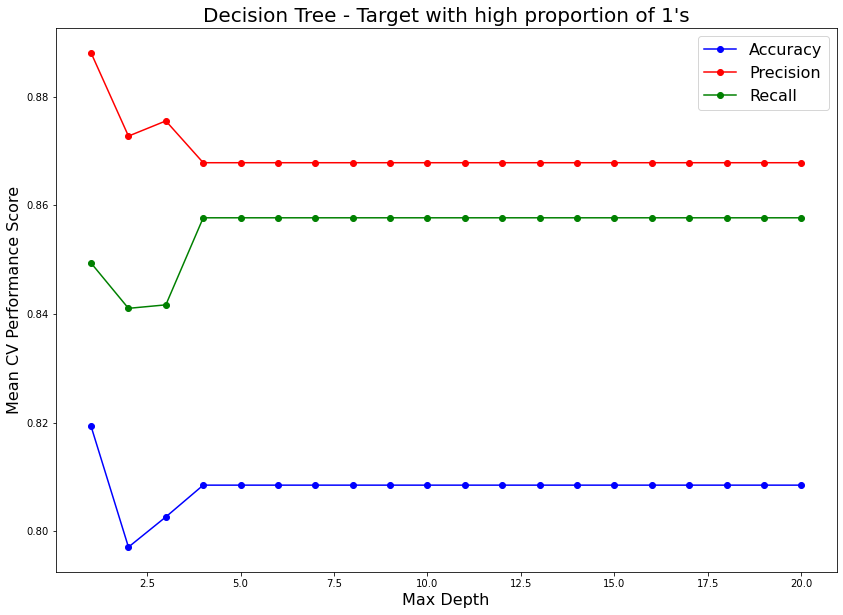

In [76]:
## Plot mean cv measure against max_depth

plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(tree_accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(tree_precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(tree_recs,axis=0),'g-o', label="Recall")
 
plt.title("Decision Tree - Target with high proportion of 1's",fontsize=20)
plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.savefig('C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/decision_tree_legal.png')
plt.show()

##### Finally, we will go one step further and train a random forest to see if we can improve with respect to the tree

In [77]:
# This imports the random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [78]:
## Random forest (10-fold cross validation)

# convert to DataFrame
df = pd.DataFrame(X_train_legal)
y_train_legal = pd.DataFrame (y_train_legal)

kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)


X_train_copy = df.copy()

# n will be the maximum max_depth I consider
n = 20

accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))

for j in range(1,n+1):
    print("Depth =", j)
    rf_legal = RandomForestClassifier(n_estimators = 5000,max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train_legal):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train_legal.iloc[train_index],y_train_legal.iloc[test_index]

        rf_legal_clone = clone(rf_legal)
        rf_legal_clone.fit(X_train_train,y_train_train.values.ravel())
        
        y_predict_legal = rf_legal_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict_legal)
        precs[i,j-1] = precision_score(y_train_test,y_predict_legal)
        recs[i,j-1] = recall_score(y_train_test,y_predict_legal)
        i = i + 1      
    

Depth = 1
Depth = 2
Depth = 3
Depth = 4
Depth = 5
Depth = 6
Depth = 7
Depth = 8
Depth = 9
Depth = 10
Depth = 11
Depth = 12
Depth = 13
Depth = 14
Depth = 15
Depth = 16
Depth = 17
Depth = 18
Depth = 19
Depth = 20


In [79]:
accs

array([[0.78947368, 0.73684211, 0.73684211, 0.78947368, 0.78947368,
        0.78947368, 0.78947368, 0.78947368, 0.78947368, 0.78947368,
        0.78947368, 0.78947368, 0.78947368, 0.78947368, 0.78947368,
        0.78947368, 0.78947368, 0.78947368, 0.78947368, 0.78947368],
       [0.89473684, 0.89473684, 0.89473684, 0.89473684, 0.89473684,
        0.89473684, 0.89473684, 0.89473684, 0.89473684, 0.89473684,
        0.89473684, 0.89473684, 0.89473684, 0.89473684, 0.89473684,
        0.89473684, 0.89473684, 0.89473684, 0.89473684, 0.89473684],
       [0.66666667, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333],
       [0.72222222, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0

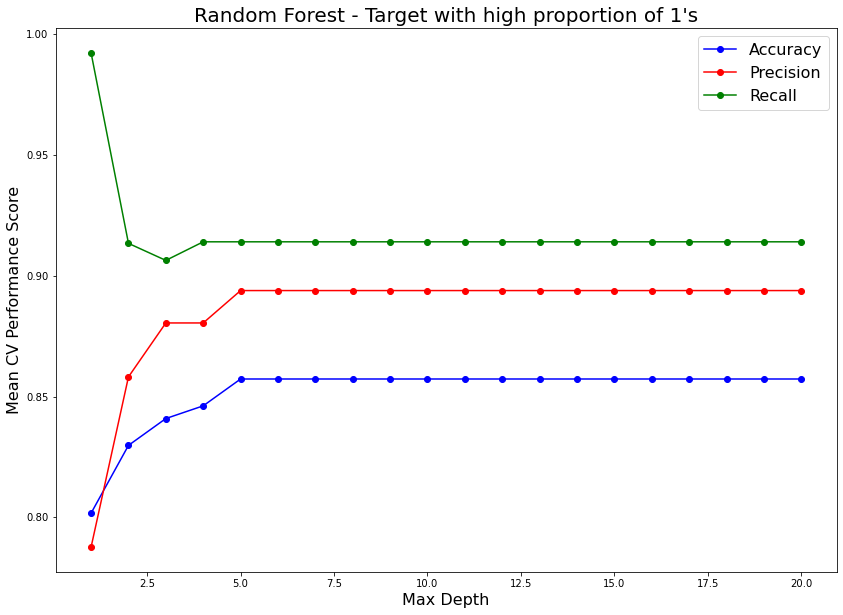

In [80]:
## Plot that mean cv measure against max_depth

## Sample Answer
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.title("Random Forest - Target with high proportion of 1's",fontsize=20)
plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.savefig('C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/random_forest_legal.png')
plt.show()

#### Target: b - recognition of past investment in clean energy. 

In [81]:
# We update the target variable: Past_investments_credits
invest = categories[["NAME","Past_investments_credits"]]
invest.head(5)

# Rename as "target"
invest = invest.rename(columns={"Past_investments_credits": "target"})
invest.head(5)
invest['target'].value_counts()

0    141
1    120
Name: target, dtype: int64

In [82]:
# Creat train and test split using the same doc_term_tfidf as X and invest['target'] as y
X_train_invest, X_test_invest, y_train_invest, y_test_invest = train_test_split(doc_term_tfidf, invest['target'], test_size=0.3, random_state=440,stratify=invest['target'])

y_train_invest

print(y_train_invest.value_counts())
print(y_test_invest.value_counts())


0    98
1    84
Name: target, dtype: int64
0    43
1    36
Name: target, dtype: int64


In [83]:
print(y_train_invest.value_counts())
print(y_test_invest.value_counts())

0    98
1    84
Name: target, dtype: int64
0    43
1    36
Name: target, dtype: int64


In [84]:
 #### Stochastic gradient descent

sgd_clf_invest = SGDClassifier(random_state=123)
sgf_clf_invest_scores = cross_val_score(sgd_clf_invest, X_train_invest, y_train_invest, cv=10)
print(sgf_clf_invest_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (sgf_clf_invest_scores.mean(), sgf_clf_invest_scores.std() * 2))

cross_val_score(sgd_clf_invest, X_train_invest, y_train_invest, cv=5, scoring='accuracy')

[0.52631579 0.57894737 0.5        0.5        0.83333333 0.61111111
 0.77777778 0.72222222 0.5        0.88888889]
Accuracy: 0.64 (+/- 0.28)


array([0.54054054, 0.62162162, 0.52777778, 0.44444444, 0.77777778])

Looking at the confusion matrix...

In [85]:
sgf_clf_invest_pred = cross_val_predict(sgd_clf_invest, X_train_invest, y_train_invest, cv=5)
print(confusion_matrix(y_train_invest, sgf_clf_invest_pred))

#_____________________________________________
#             |                |
#             |  PREDICTED NO  | PREDICTED YES
#_____________| ______________ | _____________
#             |                |
# ACTUAL NO   |                |
#_____________| ______________ | _____________
#             |                |
# ACTUAL YES  |                |
#_____________| ______________ | _____________

[[56 42]
 [34 50]]


... we can see that the results are terrible. Let's explore a grid of parameters to find a better combination.

Also, in this case (given the huge imbalance in positives and negatives) looking only at accuracy might not be the most informative decision. I will take recall into account, to see the relationship of TruePositive / (TruePositive + FalseNegative)
    

In [86]:
grid = {'fit_intercept': [True,False],
        'early_stopping': [True, False],
        'loss' : ['log'],
        'penalty' : ['l2', 'l1', 'none']}
search = GridSearchCV(estimator=sgd_clf_invest, param_grid=grid, cv=10)
search.fit(X_train_invest, y_train_invest)
search.best_params_

{'early_stopping': False,
 'fit_intercept': False,
 'loss': 'log',
 'penalty': 'l2'}

In [87]:
grid_sgd_invest_clf_scores = cross_val_score(search.best_estimator_, X_train_invest, y_train_invest, cv=5, scoring = 'recall')
print(grid_sgd_invest_clf_scores)
print("Recall:", grid_sgd_invest_clf_scores.mean())

[0.58823529 0.47058824 0.70588235 0.52941176 0.75      ]
Recall: 0.6088235294117647


Not great either.

#### Linear support vector machine SVM

In [88]:
from sklearn.svm import LinearSVC

svc_invest = LinearSVC()
svc_invest.fit(X_train_invest,y_train_invest)

train_pred_invest = svc_invest.predict(X_train_invest)

In [89]:
def tpr(actual,pred):
    tp = np.sum((actual==1) & (pred == 1))
    fn = np.sum((actual==1) & (pred == 0))
    return tp/(tp+fn)
    
def fpr(actual,pred):
    fp = np.sum((actual == 0) & (pred == 1))
    tn = np.sum((actual == 0) & (pred == 0))
    return fp/(fp+tn)

def acc(actual,pred):
    return np.sum(actual==pred)/len(actual)

In [90]:
print("The training tpr is",tpr(y_train_invest,train_pred_invest))
print("The training fpr is",fpr(y_train_invest,train_pred_invest))
print("The training accuracy is",acc(y_train_invest,train_pred_invest))

The training tpr is 0.27380952380952384
The training fpr is 0.01020408163265306
The training accuracy is 0.6593406593406593


##### We need to estimate using cross-validation. 

In [91]:
## Linear SVM (10-fold) cross validation

# I tested values of C = 0 < C < 1, and no difference in meassures were found for any values C < 1, thus the loop for various
# values of C begins in 1 and increases by 1

kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)

df = pd.DataFrame(X_train_invest)
y_train_df = pd.DataFrame (y_train_invest)

X_train_copy = df.copy()

# Regularization parameter 
Cs = 30

svc_accs = np.zeros((10, Cs))
svc_precs = np.zeros((10, Cs))
svc_recs = np.zeros((10, Cs))

for j in range(1,Cs+1):
    print("Regularization parameter =",j)
    svc_invest = LinearSVC(penalty='l2', loss='squared_hinge',dual=True, tol=0.0001, C=j, 
                multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                verbose=0, random_state=None, max_iter=5000)

    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train_df):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train_df.iloc[train_index],y_train_df.iloc[test_index]

        svc_invest_clone = clone(svc_invest)
        svc_invest_clone.fit(X_train_train, np.ravel(y_train_train,order='C')) #.values.ravel()
        
        y_predict_invest = svc_invest_clone.predict(X_train_test)
        svc_accs[i, j-1] = accuracy_score(y_train_test,y_predict_invest)
        svc_precs[i,j-1] = precision_score(y_train_test,y_predict_invest)
        svc_recs[i,j-1] = recall_score(y_train_test,y_predict_invest)
        i = i + 1


Regularization parameter = 1
Regularization parameter = 2
Regularization parameter = 3
Regularization parameter = 4
Regularization parameter = 5
Regularization parameter = 6
Regularization parameter = 7
Regularization parameter = 8
Regularization parameter = 9
Regularization parameter = 10
Regularization parameter = 11
Regularization parameter = 12
Regularization parameter = 13
Regularization parameter = 14
Regularization parameter = 15
Regularization parameter = 16
Regularization parameter = 17
Regularization parameter = 18
Regularization parameter = 19
Regularization parameter = 20
Regularization parameter = 21
Regularization parameter = 22
Regularization parameter = 23
Regularization parameter = 24
Regularization parameter = 25
Regularization parameter = 26
Regularization parameter = 27
Regularization parameter = 28
Regularization parameter = 29
Regularization parameter = 30


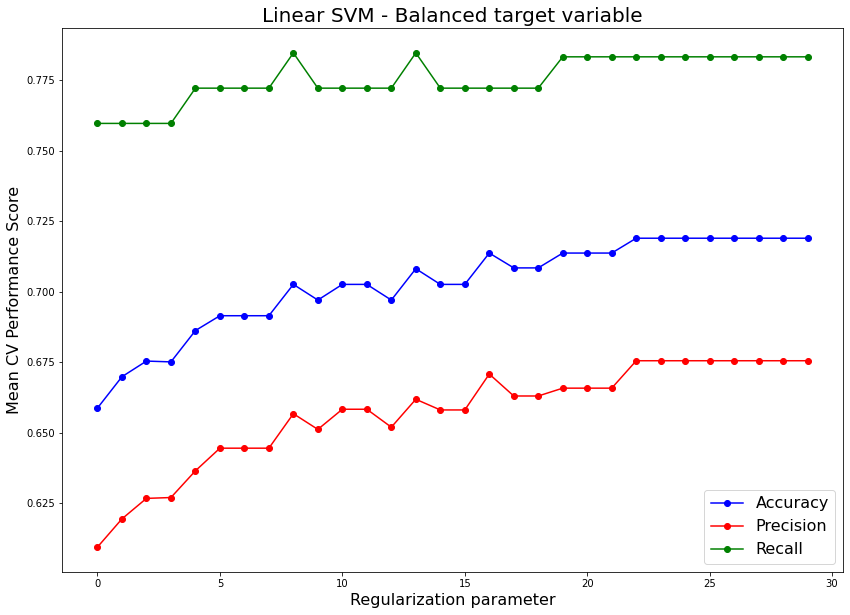

In [92]:
## Plot mean cv measure against max_depth

plt.figure(figsize=(14,10))

plt.plot(np.mean(svc_accs,axis=0),'b-o', label="Accuracy")
plt.plot(np.mean(svc_precs,axis=0),'r-o', label="Precision")
plt.plot(np.mean(svc_recs,axis=0),'g-o', label="Recall")

plt.title("Linear SVM - Balanced target variable",fontsize=20)
plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Regularization parameter",fontsize=16)

plt.legend(fontsize=16)

plt.savefig('C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/linearSVC_invest.png')
plt.show()

### Decision tree


In [93]:
from sklearn.tree import DecisionTreeClassifier

max_depth = 5
tree_clf_invest = DecisionTreeClassifier(max_depth = max_depth, 
                                  random_state = 614)

In [94]:
## Fit the tree
tree_clf_invest.fit(X_train_invest, y_train_invest)


DecisionTreeClassifier(max_depth=5, random_state=614)

Let's see the confusion matrix to see how the model is doing.

In [95]:
train_pred_invest = tree_clf_invest.predict(X_train_invest)


In [96]:

#_____________________________________________
#             |                |
#             |  PREDICTED NO  | PREDICTED YES
#_____________| ______________ | _____________
#             |                |
# ACTUAL NO   |                |
#_____________| ______________ | _____________
#             |                |
# ACTUAL YES  |                |
#_____________| ______________ | _____________


print(confusion_matrix(y_train_invest, train_pred_invest))


[[98  0]
 [ 3 81]]


Probably overfitting. Let's do cross validation.

In [97]:
# Decision tree (10-fold cross validation)


# convert to DataFrame
df = pd.DataFrame(X_train_invest)
y_train_df = pd.DataFrame (y_train_invest)

kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)

X_train_copy = df.copy()

# n will be the maximum max_depth I consider
n = 20

tree_accs = np.zeros((10,n))
tree_precs = np.zeros((10,n))
tree_recs = np.zeros((10,n))

for j in range(1,n+1):
    print("Depth =", j)    
    tree_invest = DecisionTreeClassifier(max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train_df):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train_df.iloc[train_index],y_train_df.iloc[test_index]

        tree_clone_invest = clone(tree_invest)
        tree_clone_invest.fit(X_train_train,y_train_train)
        
        y_predict_invest = tree_clone_invest.predict(X_train_test)
        tree_accs[i,j-1] = accuracy_score(y_train_test,y_predict_invest)
        tree_precs[i,j-1] = precision_score(y_train_test,y_predict_invest)
        tree_recs[i,j-1] = recall_score(y_train_test,y_predict_invest)
        i = i + 1

tree_recs


Depth = 1
Depth = 2
Depth = 3
Depth = 4
Depth = 5
Depth = 6
Depth = 7
Depth = 8
Depth = 9
Depth = 10
Depth = 11
Depth = 12
Depth = 13
Depth = 14
Depth = 15
Depth = 16
Depth = 17
Depth = 18
Depth = 19
Depth = 20


array([[0.55555556, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
        0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
        0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
        0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.44444444, 0.33333333, 0.44444444, 0.44444444,
        0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
        0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
        0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444],
       [0.55555556, 0.66666667, 0.77777778, 0.77777778, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889],
       [0.88888889, 0.55555556, 0.66666667, 0.77777778, 0.77777778,
        0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.77777778,
        0.77777778, 0.77777778, 0.77777778, 0

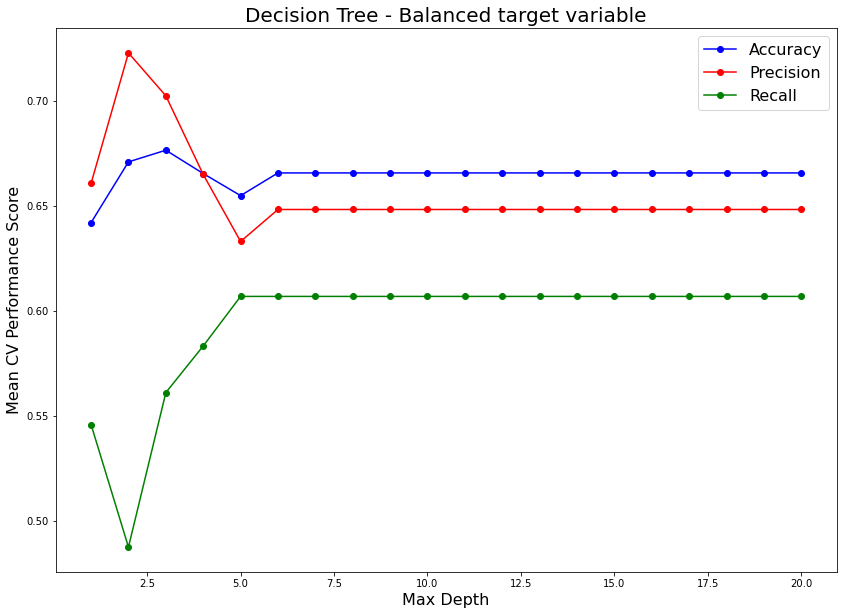

In [98]:
## Plot that mean cv measure against max_depth

plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(tree_accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(tree_precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(tree_recs,axis=0),'g-o', label="Recall")

plt.title("Decision Tree - Balanced target variable",fontsize=20)
plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.savefig('C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/decision_tree_invest.png')
plt.show()


##### Finally, we will go one step further and train a random forest to see if we can improve with respect to the tree

In [100]:
## Random forest (10-fold cros validation)

# convert to DataFrame
df = pd.DataFrame(X_train_invest)
y_train = pd.DataFrame (y_train_invest)

kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)

X_train_copy = df.copy()

# n will be the maximum max_depth I consider
n = 20

accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))

for j in range(1,n+1):
    print("Depth =", j)
    rf_invest = RandomForestClassifier(n_estimators = 5000,max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        rf_clone_invest = clone(rf_invest)
        rf_clone_invest.fit(X_train_train,y_train_train.values.ravel())
        
        y_predict_invest = rf_clone_invest.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict_invest)
        precs[i,j-1] = precision_score(y_train_test,y_predict_invest)
        recs[i,j-1] = recall_score(y_train_test,y_predict_invest)
        i = i + 1      

Depth = 1
Depth = 2
Depth = 3
Depth = 4
Depth = 5
Depth = 6
Depth = 7
Depth = 8
Depth = 9
Depth = 10
Depth = 11
Depth = 12
Depth = 13
Depth = 14
Depth = 15
Depth = 16
Depth = 17
Depth = 18
Depth = 19
Depth = 20


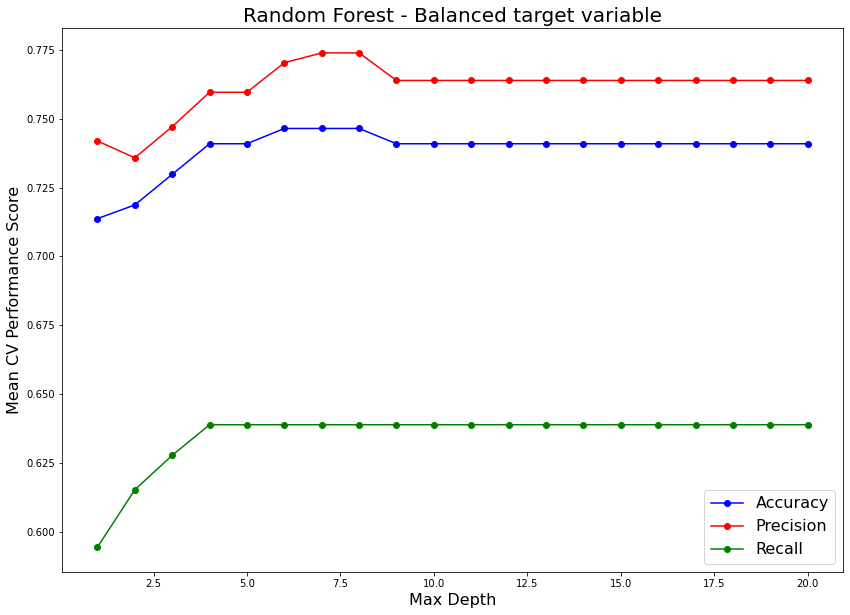

In [101]:
## Plot that mean cv measure against max_depth

## Sample Answer
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.title("Random Forest - Balanced target variable",fontsize=20)
plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.savefig('C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/random_forest_invest.png')
plt.show()

#### Target: C - environmental justice. 

In [102]:
# We update the target variable: Past_investments_credits
justice = categories[["NAME","Justice"]]
justice.head(5)

,NAME,Justice
0,60 Plus Association,0
1,Adirondack Mountain Club,0
2,Advanced Energy Economy,0
3,Advanced Energy Management Alliance,0
4,Air Permitting Forum,0


In [103]:
# Rename as "target"
justice = justice.rename(columns={"Justice": "target"})
justice.head(5)
justice['target'].value_counts()

0    222
1     39
Name: target, dtype: int64

In [104]:
# Creat train and test split using the same doc_term_tfidf as X and invest['target'] as y
X_train_justice, X_test_justice, y_train_justice, y_test_justice = train_test_split(doc_term_tfidf, justice['target'], test_size=0.3, random_state=440,stratify=justice['target'])

y_train

,target
231,1
161,1
251,0
190,0
30,0
...,...
202,1
14,0
193,0
187,1



 #### Stochastic gradient descent - Logistic regression

In [105]:
sgd_clf_justice = SGDClassifier(random_state=123)
sgf_clf_justice_scores = cross_val_score(sgd_clf_justice, X_train_justice, y_train_justice, cv=5)
print(sgf_clf_justice_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (sgf_clf_justice_scores.mean(), sgf_clf_justice_scores.std() * 2))

cross_val_score(sgd_clf_justice, X_train_justice, y_train_justice, cv=5, scoring='accuracy')


[0.83783784 0.83783784 0.86111111 0.86111111 0.86111111]
Accuracy: 0.85 (+/- 0.02)


array([0.83783784, 0.83783784, 0.86111111, 0.86111111, 0.86111111])

Looking at the confusion matrix...


In [106]:
sgf_clf_justice_pred = cross_val_predict(sgd_clf_justice, X_train_justice, y_train_justice, cv=5)
print(confusion_matrix(y_train_justice, sgf_clf_justice_pred))

#_____________________________________________
#             |                |
#             |  PREDICTED NO  | PREDICTED YES
#_____________| ______________ | _____________
#             |                |
# ACTUAL NO   |                |
#_____________| ______________ | _____________
#             |                |
# ACTUAL YES  |                |
#_____________| ______________ | _____________

[[155   0]
 [ 27   0]]


... we can see that the results are not great

In [107]:
grid = {'fit_intercept': [True,False],
        'early_stopping': [True, False],
        'loss' : ['log'],
        'penalty' : ['l2', 'l1', 'none']}
search_justice = GridSearchCV(estimator=sgd_clf_justice, param_grid=grid, cv=5)
search_justice.fit(X_train_justice, y_train_justice)
search_justice.best_params_

{'early_stopping': True,
 'fit_intercept': False,
 'loss': 'log',
 'penalty': 'l2'}

In [108]:
grid_sgd_clf_scores = cross_val_score(search_justice.best_estimator_, X_train_justice, y_train_justice, scoring = "accuracy",cv=5)
print(grid_sgd_clf_scores)
print("accuracy:", grid_sgd_clf_scores.mean())

[0.83783784 0.83783784 0.86111111 0.86111111 0.86111111]
accuracy: 0.8518018018018019


In [109]:
grid_sgd_clf_scores = cross_val_score(search_justice.best_estimator_, X_train_justice, y_train_justice, scoring = "recall",cv=5)
print(grid_sgd_clf_scores)
print("Recall:", grid_sgd_clf_scores.mean())

[0. 0. 0. 0. 0.]
Recall: 0.0


#### Linear support vector machine SVM

In [110]:
from sklearn.svm import LinearSVC

svc_justice = LinearSVC()
svc_justice.fit(X_train_justice,y_train_justice)

train_pred_justice = svc_justice.predict(X_train_justice)

In [111]:
def tpr(actual,pred):
    tp = np.sum((actual==1) & (pred == 1))
    fn = np.sum((actual==1) & (pred == 0))
    return tp/(tp+fn)
    
def fpr(actual,pred):
    fp = np.sum((actual == 0) & (pred == 1))
    tn = np.sum((actual == 0) & (pred == 0))
    return fp/(fp+tn)

def acc(actual,pred):
    return np.sum(actual==pred)/len(actual)

In [112]:
print("The training tpr is",tpr(y_train_justice,train_pred_justice))
print("The training fpr is",fpr(y_train_justice,train_pred_justice))
print("The training accuracy is",acc(y_train_justice,train_pred_justice))

The training tpr is 0.0
The training fpr is 0.0
The training accuracy is 0.8516483516483516


##### We need to estimate using cross-validation. 

In [113]:
## Linear SVM (10-fold cross validation)

# I tested values of C = 0 < C < 1, and no difference in meassures were found for any values C < 1, thus the loop for various
# values of C begins in 1 and increases by 1

kfold = StratifiedKFold(n_splits=10 ,shuffle = True,random_state=440)

df = pd.DataFrame(X_train_justice)
y_train_df = pd.DataFrame (y_train_justice)

X_train_copy = df.copy()

# Regularization parameter 
Cs = 20

svc_accs = np.zeros((10, Cs))
svc_precs = np.zeros((10, Cs))
svc_recs = np.zeros((10, Cs))

for j in range(1,Cs+1):
    print("Regularization parameter =",j)
    svc_justice = LinearSVC(penalty='l2', loss='squared_hinge',dual=True, tol=0.0001, C=j, 
                multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                verbose=0, random_state=None, max_iter=5000)

    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train_df):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train_df.iloc[train_index],y_train_df.iloc[test_index]

        svc_clone_justice = clone(svc_justice)
        svc_clone_justice.fit(X_train_train, np.ravel(y_train_train,order='C')) #.values.ravel()
        
        y_predict_justice = svc_clone_justice.predict(X_train_test)
        svc_accs[i, j-1] = accuracy_score(y_train_test,y_predict_justice)
        svc_precs[i,j-1] = precision_score(y_train_test,y_predict_justice)
        svc_recs[i,j-1] = recall_score(y_train_test,y_predict_justice)
        i = i + 1



Regularization parameter = 1
Regularization parameter = 2
Regularization parameter = 3
Regularization parameter = 4
Regularization parameter = 5
Regularization parameter = 6
Regularization parameter = 7
Regularization parameter = 8
Regularization parameter = 9
Regularization parameter = 10
Regularization parameter = 11
Regularization parameter = 12
Regularization parameter = 13
Regularization parameter = 14
Regularization parameter = 15
Regularization parameter = 16
Regularization parameter = 17
Regularization parameter = 18
Regularization parameter = 19
Regularization parameter = 20
Regularization parameter = 21
Regularization parameter = 22
Regularization parameter = 23
Regularization parameter = 24
Regularization parameter = 25
Regularization parameter = 26
Regularization parameter = 27
Regularization parameter = 28
Regularization parameter = 29
Regularization parameter = 30


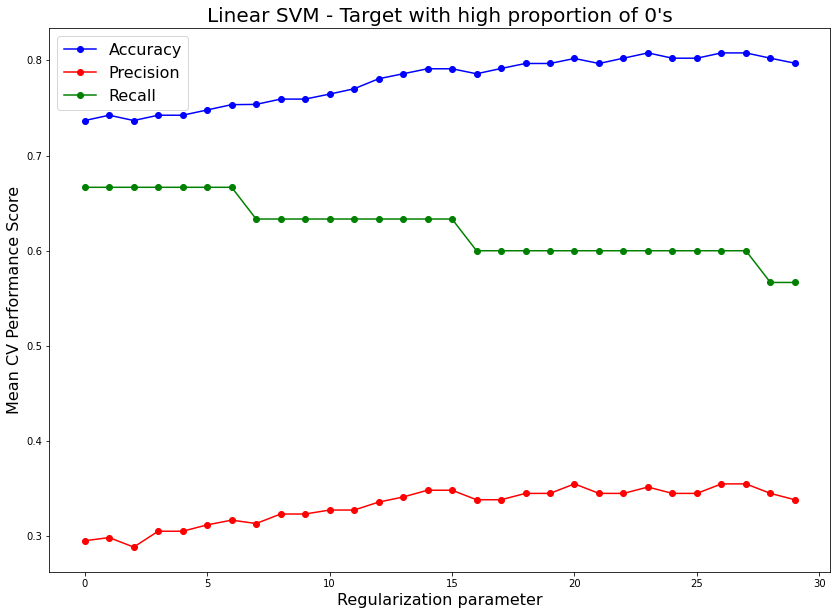

In [114]:
## Plot that mean cv measure against max_depth

plt.figure(figsize=(14,10))

plt.plot(np.mean(svc_accs,axis=0),'b-o', label="Accuracy")
plt.plot(np.mean(svc_precs,axis=0),'r-o', label="Precision")
plt.plot(np.mean(svc_recs,axis=0),'g-o', label="Recall")

plt.title("Linear SVM - Target with high proportion of 0's",fontsize=20)
plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Regularization parameter",fontsize=16)

plt.legend(fontsize=16)

plt.savefig('C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/linearSVC_justice.png')
plt.show()

### Decision tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
max_depth = 5
tree_clf_justice = DecisionTreeClassifier(max_depth = max_depth, 
                                  random_state = 614)
## Fit the tree
tree_clf_justice.fit(X_train_justice, y_train_justice)

DecisionTreeClassifier(max_depth=5, random_state=614)

Let's see the confusion matrix to see how the model is doing.

In [117]:
train_pred_justice = tree_clf_justice.predict(X_train_justice)

In [118]:

#_____________________________________________
#             |                |
#             |  PREDICTED NO  | PREDICTED YES
#_____________| ______________ | _____________
#             |                |
# ACTUAL NO   |                |
#_____________| ______________ | _____________
#             |                |
# ACTUAL YES  |                |
#_____________| ______________ | _____________


print(confusion_matrix(y_train_justice, train_pred_justice))

[[155   0]
 [  1  26]]


We might be overfitting again

In [119]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.base import clone
## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score

In [120]:
# Decision tree (10-fold cross validation)

# convert to DataFrame
df = pd.DataFrame(X_train_justice)
y_train_df = pd.DataFrame (y_train_justice)

kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)

X_train_copy = df.copy()

# n will be the maximum max_depth I consider
n = 30

tree_accs = np.zeros((10,n))
tree_precs = np.zeros((10,n))
tree_recs = np.zeros((10,n))

for j in range(1,n+1):
    print("Depth =", j)    
    tree_justice = DecisionTreeClassifier(max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train_df):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train_df.iloc[train_index],y_train_df.iloc[test_index]

        tree_justice_clone = clone(tree_justice)
        tree_justice_clone.fit(X_train_train,y_train_train)
        
        y_predict_justice = tree_justice_clone.predict(X_train_test)
        tree_accs[i,j-1] = accuracy_score(y_train_test,y_predict_justice)
        tree_precs[i,j-1] = precision_score(y_train_test,y_predict_justice)
        tree_recs[i,j-1] = recall_score(y_train_test,y_predict_justice)
        i = i + 1

tree_recs

Depth = 1


C:\Users\holmf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\holmf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\holmf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\holmf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

Depth = 2


C:\Users\holmf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\holmf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\holmf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Depth = 3


C:\Users\holmf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\holmf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Depth = 4
Depth = 5
Depth = 6
Depth = 7
Depth = 8
Depth = 9
Depth = 10
Depth = 11
Depth = 12
Depth = 13
Depth = 14
Depth = 15
Depth = 16
Depth = 17
Depth = 18
Depth = 19
Depth = 20
Depth = 21
Depth = 22
Depth = 23
Depth = 24
Depth = 25
Depth = 26
Depth = 27
Depth = 28
Depth = 29
Depth = 30


array([[0.66666667, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.

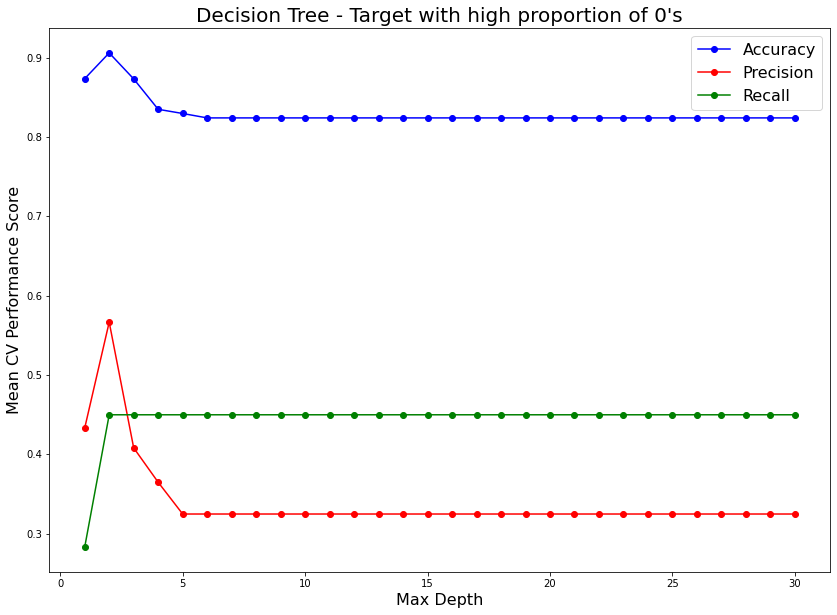

In [121]:
## Plot mean cv measure against max_depth

plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(tree_accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(tree_precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(tree_recs,axis=0),'g-o', label="Recall")

plt.title("Decision Tree - Target with high proportion of 0's",fontsize=20)
plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.savefig('C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/decision_tree_justice.png')
plt.show()


##### Finally, we will go one step further and train a random forest to see if we can improve with respect to the tree

In [122]:
# This imports the random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [123]:
# Random forest (10-fold cross validation)

# convert to DataFrame
df = pd.DataFrame(X_train_justice)
y_train = pd.DataFrame (y_train_justice)

kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)

X_train_copy = df.copy()

# n will be the maximum max_depth I consider
n = 20

accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))

for j in range(1,n+1):
    print("Depth =", j)
    rf_justice = RandomForestClassifier(n_estimators = 5000,max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        rf_justice_clone = clone(rf_justice)
        rf_justice_clone.fit(X_train_train,y_train_train.values.ravel())
        
        y_predict_justice = rf_justice_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict_justice)
        precs[i,j-1] = precision_score(y_train_test,y_predict_justice)
        recs[i,j-1] = recall_score(y_train_test,y_predict_justice)
        i = i + 1      

accs

Depth = 1
Depth = 2
Depth = 3
Depth = 4
Depth = 5
Depth = 6
Depth = 7
Depth = 8
Depth = 9
Depth = 10
Depth = 11
Depth = 12
Depth = 13
Depth = 14
Depth = 15
Depth = 16
Depth = 17
Depth = 18
Depth = 19
Depth = 20


array([[0.86486486, 0.86486486, 0.86486486, 0.86486486, 0.86486486,
        0.86486486, 0.86486486, 0.86486486, 0.86486486, 0.86486486,
        0.86486486, 0.86486486, 0.86486486, 0.86486486, 0.86486486,
        0.86486486, 0.86486486, 0.86486486, 0.86486486, 0.86486486],
       [0.89189189, 0.91891892, 0.91891892, 0.91891892, 0.91891892,
        0.91891892, 0.91891892, 0.91891892, 0.91891892, 0.91891892,
        0.91891892, 0.91891892, 0.91891892, 0.91891892, 0.91891892,
        0.91891892, 0.91891892, 0.91891892, 0.91891892, 0.91891892],
       [0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889],
       [0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0

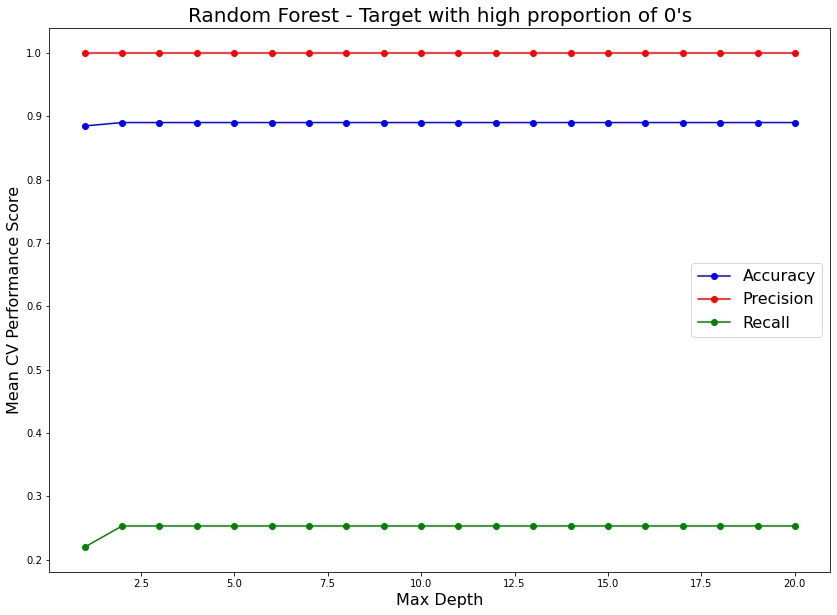

In [124]:
## Plot that mean cv measure against max_depth

## Sample Answer
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.title("Random Forest - Target with high proportion of 0's",fontsize=20)
plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.savefig('C:/Users/holmf/Dropbox/Boot Camp_data project - Copy/random_forest_justice.png')
plt.show()

#### Model selection and prediction on test set

Model selection. Taking into account accuracy and recall* measures (the two most relevant for us), the results show that the **Linear SVC** is the best performing model. The plots also show that the best training results are achieved at a depth of 3, so I will fix the hyperparameter at 4 for prediction on the test set.


*number of correct results divided by the number of results that should have been returned.

In [135]:
# legal with number of splits = 3

df = pd.DataFrame(X_train_legal)
y_train = pd.DataFrame (y_train_legal)

kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)

svc_legal = LinearSVC(penalty='l2', loss='squared_hinge',dual=True, tol=0.0001, C=5, 
                multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                verbose=0, random_state=None, max_iter=5000)

for train_index,test_index in kfold.split(df,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        svc_legal.fit(X_train_train,y_train_train.values.ravel())

In [136]:
y_predict_legal = svc_legal.predict(X_test_legal)
accs_legal = accuracy_score(y_test_legal,y_predict_legal)
precs_legal = precision_score(y_test_legal,y_predict_legal)
recs_legal = recall_score(y_test_legal,y_predict_legal)

In [143]:
print("The accuracy for the linear SVM on the 'legal target' test data is",accs_legal)
print("The precision for the linear SVM on the 'legal target' test data is",precs_legal)
print("The recall for the linear SVM on the 'legal target' test data is",recs_legal)

The accuracy for the decision tree on the 'legal target' test data is 0.46835443037974683
The precision for the decision tree on the 'legal target' test data is 0.625
The recall for the decision tree on the 'legal target' test data is 0.5555555555555556


In [137]:
# invest with number of splits = 3

df = pd.DataFrame(X_train_invest)
y_train = pd.DataFrame (y_train_invest)

kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)

svc_invest = LinearSVC(penalty='l2', loss='squared_hinge',dual=True, tol=0.0001, C=5, 
                multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                verbose=0, random_state=None, max_iter=5000)

for train_index,test_index in kfold.split(df,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        svc_invest .fit(X_train_train,y_train_train.values.ravel())

In [144]:
y_predict_invest = svc_invest .predict(X_test_invest)
accs_invest = accuracy_score(y_test_invest,y_predict_invest)
precs_invest = precision_score(y_test_invest,y_predict_invest)
recs_invest = recall_score(y_test_invest,y_predict_invest)

In [145]:
print("The accuracy for the linear SVM on the 'investment target' test data is",accs_invest)
print("The precision for the linear SVM on the 'investment target' test data is",precs_invest)
print("The recall for the linear SVM on the 'investment target' test data is",recs_invest)

The accuracy for the decision tree on the 'investment target' test data is 0.4177215189873418
The precision for the decision tree on the 'investment target' test data is 0.3333333333333333
The recall for the decision tree on the 'investment target' test data is 0.2777777777777778


In [146]:
# justice with max depth = 3

df = pd.DataFrame(X_train_justice)
y_train = pd.DataFrame (y_train_justice)

kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)

svc_justice = LinearSVC(penalty='l2', loss='squared_hinge',dual=True, tol=0.0001, C=5, 
                multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                verbose=0, random_state=None, max_iter=5000)

for train_index,test_index in kfold.split(df,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        svc_justice.fit(X_train_train,y_train_train.values.ravel())

In [147]:
y_predict_justice = svc_justice.predict(X_test_justice)
accs_justice = accuracy_score(y_test_justice,y_predict_justice)
precs_justice = precision_score(y_test_justice,y_predict_justice)
recs_justice = recall_score(y_test_justice,y_predict_justice)

In [148]:
print("The accuracy for the linear SVM on the 'legal target' test data is",accs_justice)
print("The precision for the linear SVM on the 'legal target' test data is",precs_justice)
print("The recall for the linear SVM on the 'legal target' test data is",recs_justice)

The accuracy for the decision tree on the 'legal target' test data is 0.8227848101265823
The precision for the decision tree on the 'legal target' test data is 0.4444444444444444
The recall for the decision tree on the 'legal target' test data is 0.6666666666666666


This code was written as the final project for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Federico Holm, Ph. D., 2021.

Redistribution of the material contained in this repository is conditional on acknowledgement of Federico Holm, Ph.D.'s original authorship.